In [25]:
#import required libraries
import numpy as np
from tensorflow import keras
import pandas as pd
import math
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import joblib
from sklearn.model_selection import StratifiedKFold,cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
#Description
#Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples.
# Each example is a 28x28 grayscale image, associated with a label from 10 classes.
#'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'

In [14]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#create a list of labels
classes=[]
for i in train_labels:
  if i not in classes:
    classes.append(i)

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
print(classes)

[9, 0, 3, 2, 7, 5, 1, 6, 4, 8]


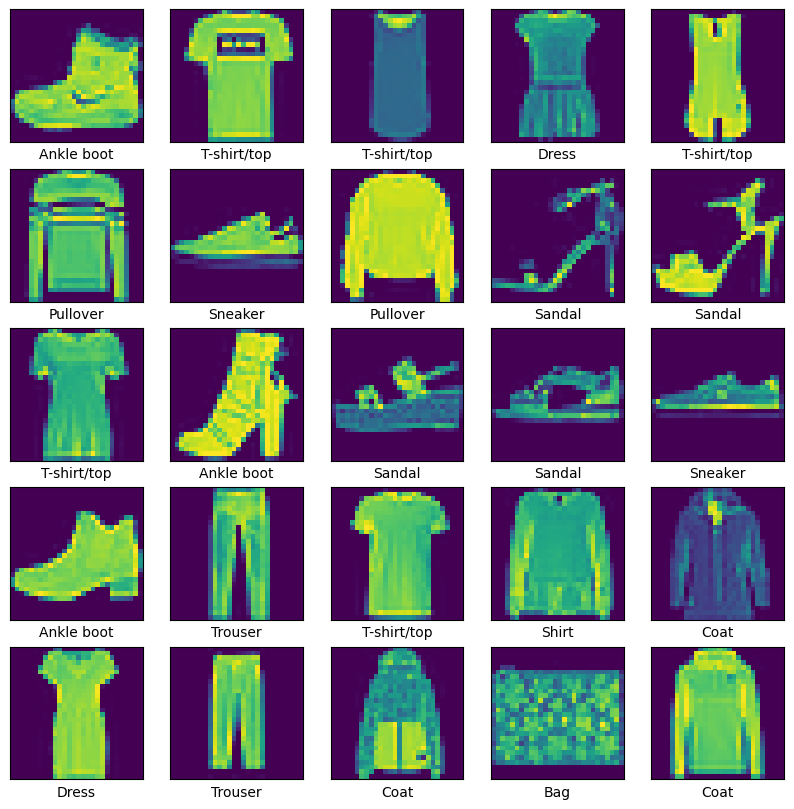

In [5]:
# Display sample images from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()


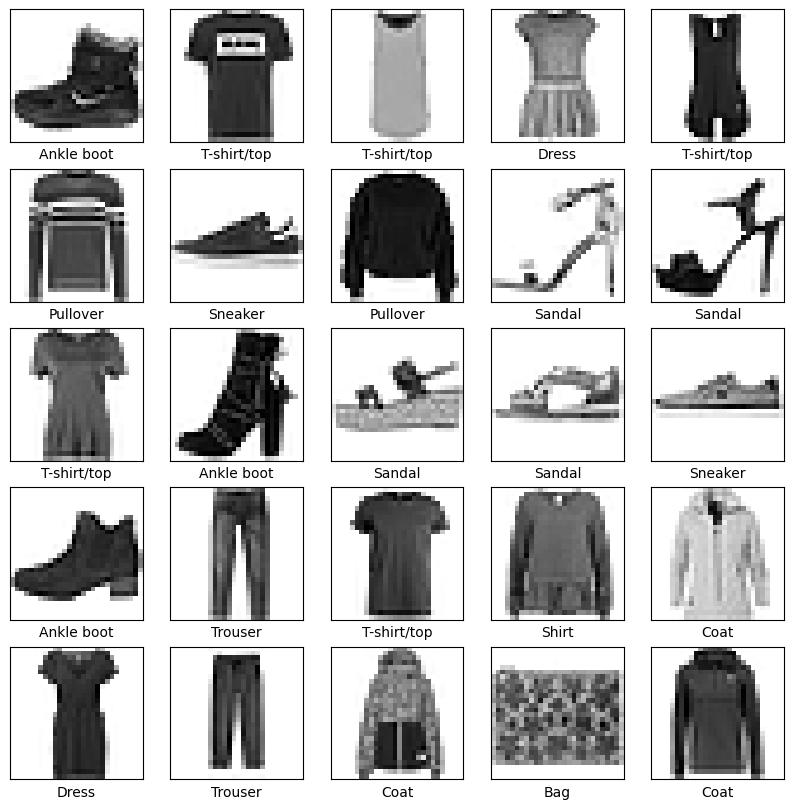

In [6]:
# Display sample images from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


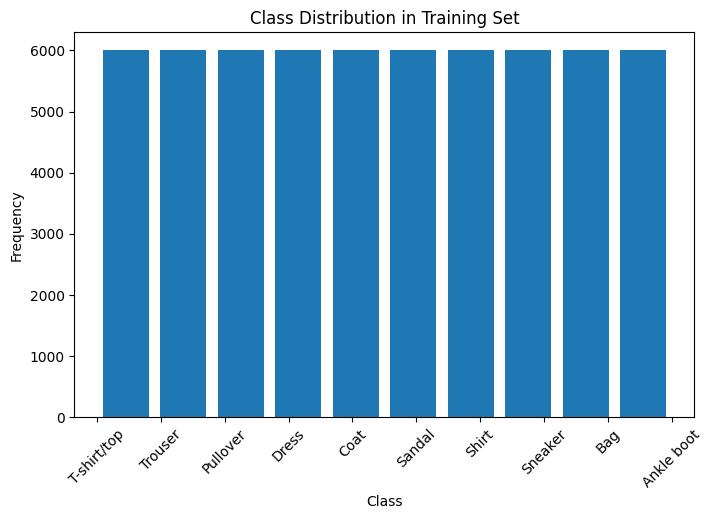

In [7]:
# Plot histogram for class distribution
plt.figure(figsize=(8,5))
plt.hist(train_labels, bins=len(classes), rwidth=0.8)
plt.xticks(range(len(classes)), class_names, rotation=45)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

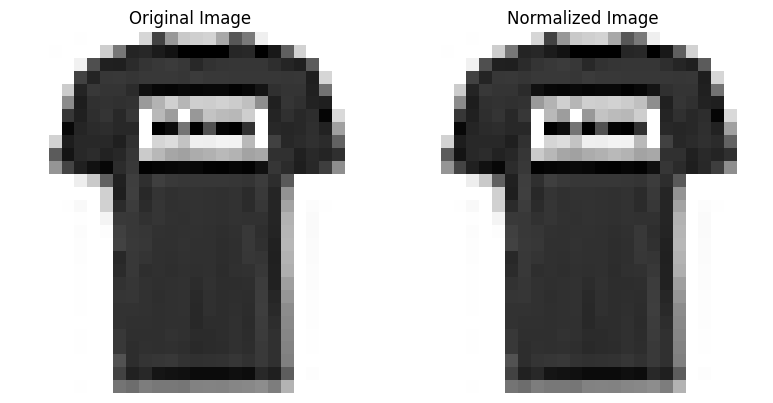

In [8]:
# normalized images
normalized_image = train_images[1] / 255.0  # Normalize pixel values to [0, 1]
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image, cmap=plt.cm.binary)
plt.title('Normalized Image')
plt.axis('off')
plt.tight_layout()
plt.show()

In [15]:
# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images
train_images = train_images.reshape((-1, 28 * 28))
test_images = test_images.reshape((-1, 28 * 28))

In [16]:
train_images.shape

(60000, 784)

In [17]:
test_images.shape

(10000, 784)

#Random Forest Classifier

In [27]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Initialize k-fold cross-validation
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_scores = []

# Perform k-fold cross-validation
for train_index, test_index in skf.split(train_images, train_labels):
    X_train, X_test = train_images[train_index], train_images[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    # Train Random Forest classifier
    rf_classifier.fit(X_train, y_train)

    # Evaluate on validation set
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy: {mean_accuracy}")


Mean Accuracy: 0.8815999999999999


In [28]:
rf_preds = rf_classifier.predict(test_images)

In [31]:
model_filename = 'random_forest_model.joblib'
joblib.dump(rf_classifier, model_filename)
print(f'Saved model to {model_filename}')

# Now, to import the model later:
# Load the saved model
loaded_model = joblib.load(model_filename)

Saved model to random_forest_model.joblib


[[848   0  12  34   3   1  90   0  12   0]
 [  2 958   5  24   4   0   5   0   2   0]
 [ 13   0 804   9 113   0  56   0   5   0]
 [ 21   3  11 900  32   0  31   0   2   0]
 [  0   2  93  32 821   0  49   0   3   0]
 [  0   0   0   1   0 956   0  30   1  12]
 [149   2 123  30  94   0 582   0  20   0]
 [  0   0   0   0   0  12   0 943   0  45]
 [  0   2   4   1   5   2   5   5 976   0]
 [  0   0   0   0   0  10   1  43   2 944]]


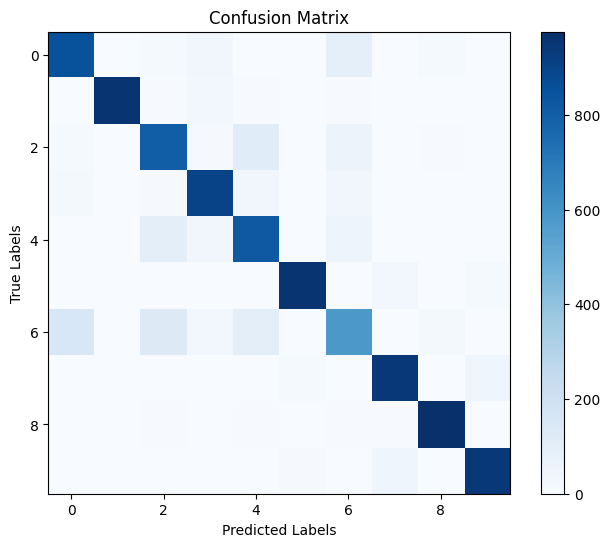

In [29]:
# Confusion Matrix

cm = confusion_matrix(test_labels, rf_preds)
print(cm)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Misclassified Examples: 1268


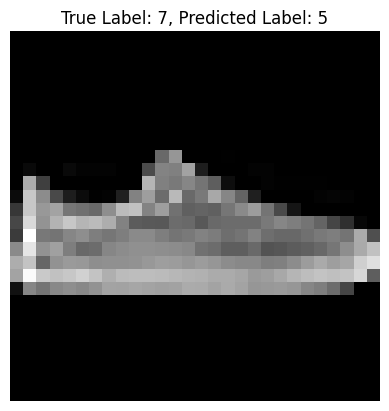

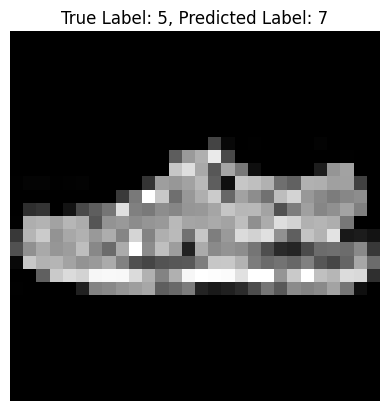

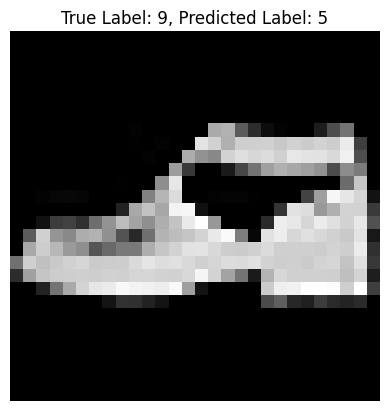

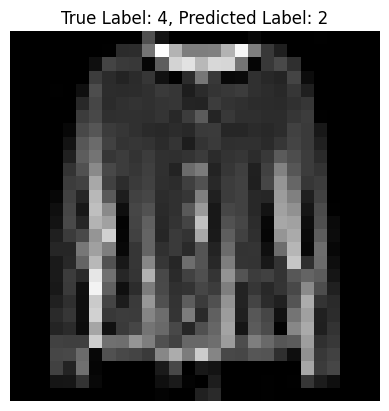

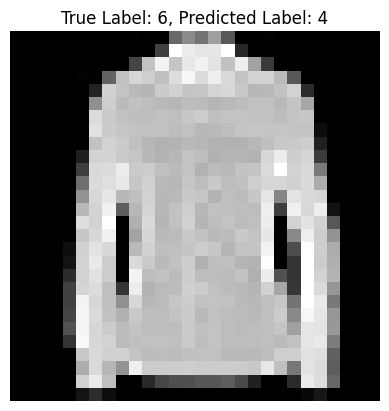

In [35]:
# Display misclassified examples
misclassified_idx = np.where(test_labels != rf_preds)[0]
print("Misclassified Examples:",len(misclassified_idx))
for idx in misclassified_idx[:5]:
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True Label: {test_labels[idx]}, Predicted Label: {rf_preds[idx]}')
    plt.axis('off')
    plt.show()

#Support Vector Classifier

In [36]:
# Split data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [37]:
# Create a Linear SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the Linear SVM classifier
svm_classifier.fit(train_images, train_labels)

# Predict labels for validation data
predicted_labels = svm_classifier.predict(val_images)

# Calculate accuracy
accuracy = accuracy_score(val_labels, predicted_labels)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

Validation accuracy: 84.82%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
model_filename = 'svm_classifier.joblib'
joblib.dump(svm_classifier, model_filename)
print(f'Saved model to {model_filename}')

# Now, to import the model later:
# Load the saved model
loaded_model = joblib.load(model_filename)

Saved model to svm_classifier.joblib


[[ 979    7   29   71   11    2   85    1   16    1]
 [   5 1172    3   27    4    0    5    1    2    0]
 [  20    3  900    8  189    0   75    0   10    0]
 [  38   18   14 1046   42    1   18    1    6    0]
 [   6    4   74   48  987    0   76    1    6    0]
 [   3    1    1    3    0 1125    1   49    8   20]
 [ 200   10  139   52  141    0  648    0   27    1]
 [   0    0    0    1    0   42    0 1073    4   39]
 [   7    0    7   17   10   14   23    6 1110    3]
 [   0    0    0    2    0   18    0   42    3 1138]]


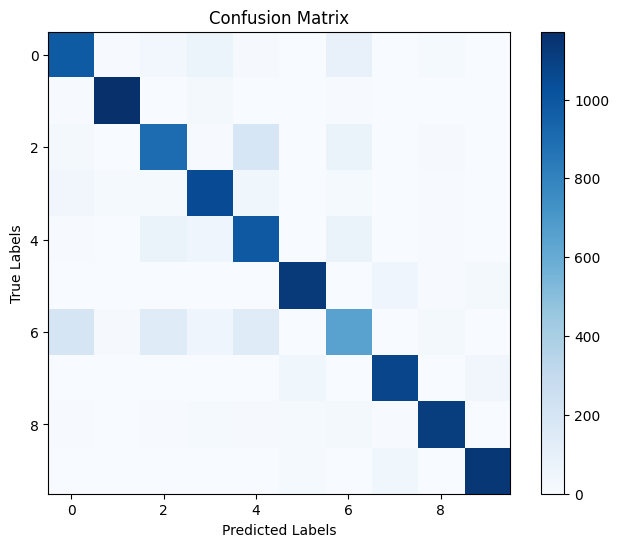

In [39]:
#Confusion Matrix

cm = confusion_matrix(val_labels, predicted_labels)
print(cm)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Misclassified Examples: 1822


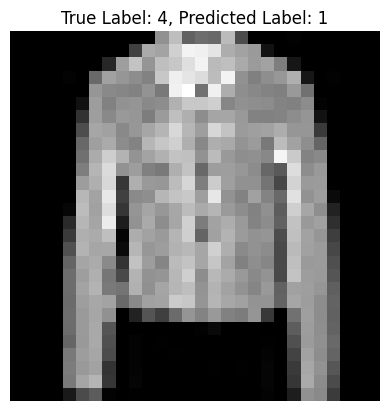

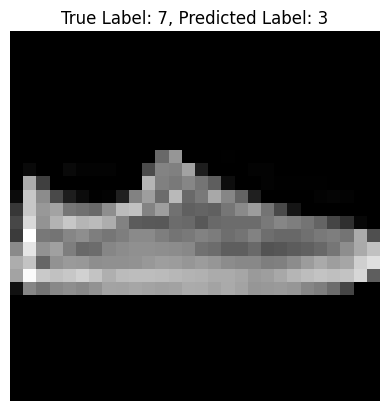

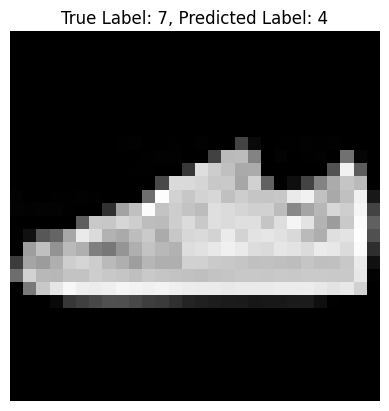

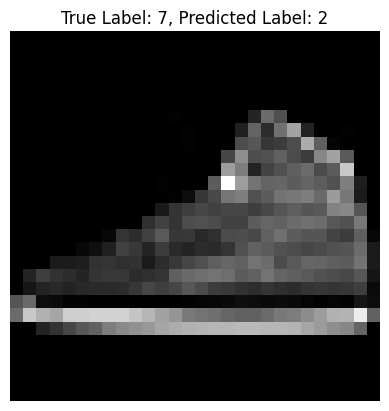

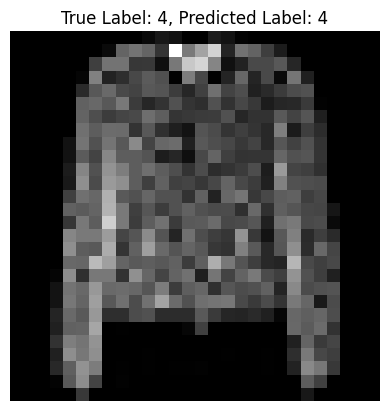

In [40]:
# Display misclassified examples
misclassified_idx = np.where(val_labels != predicted_labels)[0]
print("Misclassified Examples:",len(misclassified_idx))
for idx in misclassified_idx[:5]:
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True Label: {test_labels[idx]}, Predicted Label: {predicted_labels[idx]}')
    plt.axis('off')
    plt.show()